### Use of CNN to classify the images of the MNIST dataset 

#### Load the dataset and investigate the size of it 

In [1]:
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print('size of X_train :' +  str(X_train.shape[0]))
print('size of y_train:' +  str(y_train.shape[0]))
print('size of X_test :' +  str(X_test.shape[0]))

size of X_train :60000
size of y_train:60000
size of X_test :10000


In [5]:
print(y_train.shape)

(60000,)


#### Visualize some random image of the train and test set and print its label

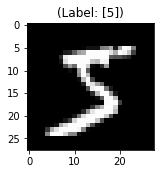

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
import os


plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (28,28))
#curr_lbl = np.argmax(y_train[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str([y_train[0]]) + ")")
plt.show()

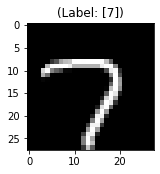

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
import os


plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_test[1110], (28,28))
#curr_lbl = np.argmax(y_train[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str([y_test[1110]]) + ")")
plt.show()

#### Is the distribution of the digits unbalanced? No, check bar chart below

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
import pandas as pd

df = pd.DataFrame({
    'category': y_train
})

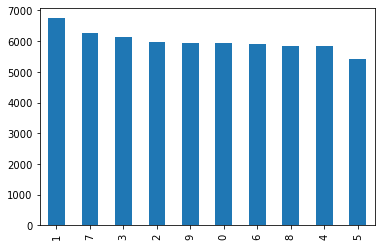

In [11]:
df['category'].value_counts().plot.bar()


In [14]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]


#### Define the CNN architecture : two convolutional & pooling layers and a fully connected layer with a relu activation function for all of them except for the last one, using softmax

In [15]:
from keras import layers


In [16]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(0.2))

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(layers.Dense(10, activation='softmax'))


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

In [17]:
import os
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#### Prepare the data to feed to the model : preprocessing and train/test/validation split

##### Convert the numbers from 0 to 9 to a one hot encoder format, categorical , that the network can see

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#y_val = to_categorical(y_val)


In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### Split the training set into train and validation to check the performance while training 

In [20]:
X_train = X_train[:50000]
y_train = y_train[:50000]
X_val = X_train[50000:]
y_val = y_train[50000:]

In [21]:
X_train.shape

(50000, 28, 28)

In [22]:
y_train.shape

(50000, 10)

In [23]:
# Reshaping the dataset in (28, 28, 1) in order to feed into neural network
# THe convolution takes the input tensors of shape (image_height, image_width, image_channels) 

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [24]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [25]:
X_test.shape

(10000, 28, 28, 1)

#### Feed the training dataset and the validation one to the model

In [26]:

classifier.fit(X_train, y_train,
                         steps_per_epoch = 100,
                         epochs = 10,
                         validation_data = (X_val, y_val),
                         validation_steps = 100)

Train on 50000 samples, validate on 0 samples
Epoch 1/5
20/20 [==============================] - 355s 18s/step - loss: 1.6839 - accuracy: 0.4489 - precision: 0.6213 - recall: 0.0395 - val_loss: nan - val_accuracy: nan - val_precision: 16.0435 - val_recall: 3.2168
Epoch 2/5
20/20 [==============================] - 357s 18s/step - loss: 0.6092 - accuracy: 0.8028 - precision: 0.8323 - recall: 0.3276 - val_loss: nan - val_accuracy: nan - val_precision: 17.1412 - val_recall: 8.9478
Epoch 3/5
20/20 [==============================] - 339s 17s/step - loss: 0.3068 - accuracy: 0.9043 - precision: 0.8761 - recall: 0.5309 - val_loss: nan - val_accuracy: nan - val_precision: 17.8141 - val_recall: 11.8500
Epoch 4/5
20/20 [==============================] - 299s 15s/step - loss: 0.1914 - accuracy: 0.9410 - precision: 0.9023 - recall: 0.6401 - val_loss: nan - val_accuracy: nan - val_precision: 18.2266 - val_recall: 13.5357
Epoch 5/5
20/20 [==============================] - 297s 15s/step - loss: 0.1419 

#### Plot of the train/validation metrics from the model above

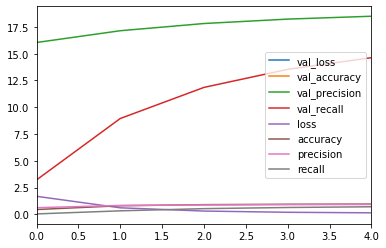

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


model_loss = pd.DataFrame(classifier.history.history)
model_loss.plot()
plt.show()

#### Use the test set to evaluate the model

In [29]:
loss, acc, prec, rec = classifier.evaluate(X_test, y_test)
print('accuracy', acc)
print('loss',loss)
print('precision',prec)
print('recall',rec)

10000/10000 [==============================] - 1s 73us/step
accuracy 0.9801999926567078
loss 0.06448171136938036
precision 0.9247494339942932
recall 0.7314754128456116


In [30]:
print("Loss of the model is - " , classifier.evaluate(X_test, y_test)[0])
print("Accuracy of the model is - " , classifier.evaluate(X_test, y_test)[1])

10000/10000 [==============================] - 1s 67us/step
Loss of the model is -  0.06448171136938036
10000/10000 [==============================] - 1s 69us/step
Accuracy of the model is -  0.9801999926567078
